Analysis 3

In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\india\My Python Files\DataAnalysisProject\Cleanedautos.csv')
df = df.drop(columns = ['Unnamed: 0'])

1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

Reducing memory usage can be done through by converting data types from integer to float and vice versa, optimizing text data, and eliminating not reqired columns to streamline data size for analysis.

2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

<Axes: xlabel='fuelType', ylabel='price'>

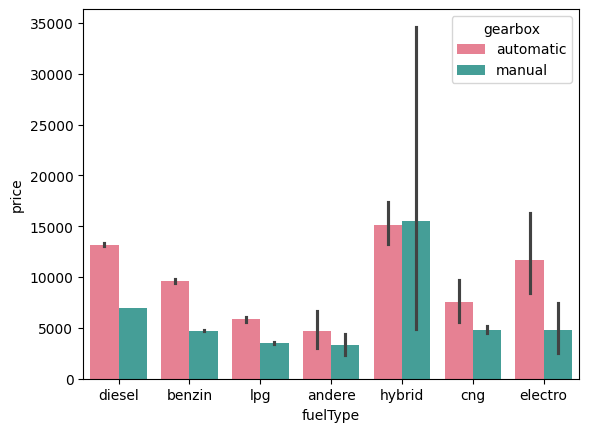

In [14]:
avgfuel_gearbox = df.groupby(['fuelType', 'gearbox'])['price'].mean().reset_index()
sns.barplot(x='fuelType', y='price', hue='gearbox',palette="husl", data=df)

* 'Hybrid' vehicles with both automatic and manual gearboxes have the highest prices compared to other fuel types. 

3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [17]:
s = df.groupby(by = ['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()
s

,vehicleType,gearbox,powerPS
0,andere,automatic,159.981481
1,andere,manual,106.164980
2,bus,automatic,146.997601
3,bus,manual,114.999822
4,cabrio,automatic,189.486359
5,cabrio,manual,138.665028
6,coupe,automatic,220.723131
7,coupe,manual,162.888071
8,kleinwagen,automatic,82.594709
9,kleinwagen,manual,77.534301


<Axes: xlabel='vehicleType', ylabel='powerPS'>

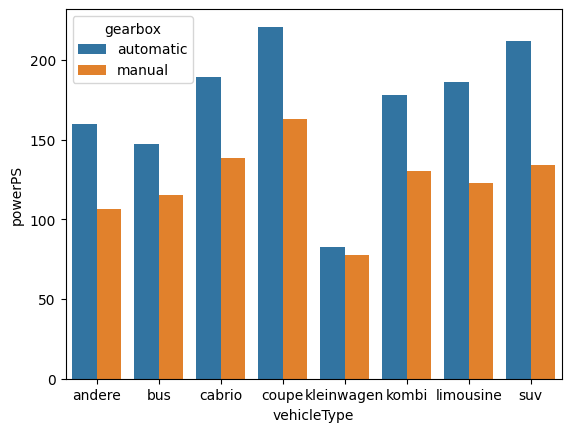

In [18]:
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', data=s)

* The average powerPS of vehicles based on the vehicle type and gearbox, where coupes exhibit the highest average power, followed by SUVs, while kleinwagens has the lowest average power.

4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [19]:
avgvehicle_brand = df.groupby(by = ['brand','vehicleType'])['price'].mean().reset_index()
avgvehicle_brand

,brand,vehicleType,price
0,alfa_romeo,andere,3394.333333
1,alfa_romeo,cabrio,9475.911602
2,alfa_romeo,coupe,7145.195238
3,alfa_romeo,kleinwagen,5082.747573
4,alfa_romeo,kombi,3918.020101
...,...,...,...
273,volvo,coupe,6114.923077
274,volvo,kleinwagen,3912.714286
275,volvo,kombi,4076.951205
276,volvo,limousine,5413.620168


In [17]:
heatmap_data = df.groupby(['brand','vehicleType'])['price'].mean().unstack()
heatmap_data

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,
alfa_romeo,3394.333333,NaN,9475.911602,7145.195238,5082.747573,3918.020101,3526.134715,NaN
audi,6556.593407,3331.250000,13743.706131,17130.712082,8365.562689,9383.741124,7945.705636,24965.486784
bmw,3322.380952,29552.978261,12347.119897,9784.151204,5337.050000,8039.822770,8374.029666,16812.048485
chevrolet,10839.833333,6337.956522,24472.242424,16833.112150,3116.620561,5134.364583,5908.948718,10097.173554
chrysler,6094.285714,3005.014327,4702.833333,9746.000000,1812.250000,5034.837607,4978.469565,6554.437500
citroen,4203.945652,4581.941227,4415.141414,3105.330579,3399.370115,4230.660377,4578.833603,11593.406250
dacia,4450.000000,8668.152174,NaN,NaN,4934.843318,4169.663717,3481.877551,9934.734375
daewoo,1067.250000,1377.608696,900.000000,1400.000000,1317.081633,1065.266667,1205.240000,1900.000000
daihatsu,1908.333333,1400.827586,7746.062500,NaN,1864.747312,3303.214286,4537.424242,2291.594595


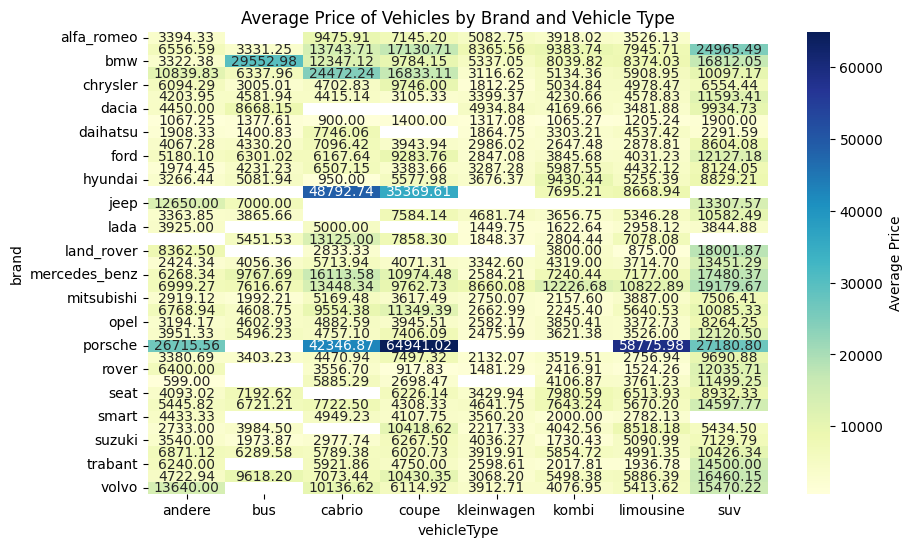

In [20]:
average_price = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()

pivot_table = average_price.pivot(index= 'brand', columns='vehicleType', values='price')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Price'})

plt.title('Average Price of Vehicles by Brand and Vehicle Type')
plt.xlabel('vehicleType')
plt.ylabel('brand')

plt.show()